# Chapter 3 — Resampling Methods

## Lab — Cross-Validation and the Bootstrap

### The Validation Set Approach

In [1]:
library("ISLR")
library("ggplot2")
set.seed(1)
train <- sample(392, 196)

In [2]:
lm.fit <- lm(mpg ~ horsepower, data = Auto, subset = train)

In [3]:
mean((Auto$mpg - predict(lm.fit, Auto))[-train]^2)

[1] 26.14142

In [4]:
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto,
              subset = train)
mean((Auto$mpg - predict(lm.fit2, Auto))[-train]^2)

[1] 19.82259

In [5]:
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto,
              subset = train)
mean((Auto$mpg - predict(lm.fit3, Auto))[-train]^2)

[1] 19.78252

In [6]:
set.seed(2)
train <- sample(392, 196)
lm.fit <- lm(mpg ~ horsepower, data = Auto, subset = train)
mean((Auto$mpg - predict(lm.fit, Auto))[-train]^2)

[1] 23.29559

In [7]:
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto,
              subset = train)
mean((Auto$mpg - predict(lm.fit2, Auto))[-train]^2)

[1] 18.90124

In [8]:
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto,
              subset = train)
mean((Auto$mpg - predict(lm.fit3, Auto))[-train]^2)

[1] 19.2574

### Leave-One-Out Cross-Validation

In [9]:
glm.fit <- glm(mpg ~ horsepower, data = Auto)
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [10]:
library("boot")
glm.fit <- glm(mpg ~ horsepower, data =  Auto)
cv.err <- cv.glm(Auto, glm.fit)
cv.err$delta

[1] 24.23151 24.23114

`delta` is the vector of cross-validation results, given by
$$
\text{CV}_{(k)} = \frac{1}{k} \sum_{i=1}^{k} \text{MSE}_i
$$
where $k = n$ for the leave-one-out, which is the default of `cv.glm`.

In [11]:
cv.error <- rep(0, 5)
for (i in 1:5) {
    glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

### *k*-Fold Cross-Validation

In [12]:
set.seed(17)
cv.error.10 <- rep(0, 10)
for(i in 1:10) {
    glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error.10[i] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
cv.error.10

[1] 24.20520 19.18924 19.30662 19.33799 18.87911 19.02103 18.89609 19.71201
 [9] 18.95140 19.50196

## The Bootstrap

### Estimating the Accuracy of a Statistic of Interest

Let’s use the **Portfolio** data set.

A simple simulated data set containing 100 returns for each of two assets, X and Y. The data is used to estimate the optimal fraction to invest in each asset to minimize investment risk of the combined portfolio. One can then use the Bootstrap to estimate the standard error of this estimate.

Name | Description
:--- | :----------
X    | Returns for Asset X
Y    | Returns for Asset Y

In [13]:
head(Portfolio)

X,Y
-0.8952509,-0.2349235
-1.5624543,-0.8851760
-0.4170899,0.2718880
1.0443557,-0.7341975
-0.3155684,0.8419834
-1.7371238,-2.0371910


Suppose that we wish to invest a fixed sum of money in two financial assets that yield returns of $X$ and $Y$, respectively, where $X$ and $Y$ are random quantities. We will invest a fraction $\alpha$ of our money in $X$, and will invest the remaining $1-\alpha$ in $Y$. Since there is variability associated with the returns on these two assets, we wish to choose $\alpha$ to minimize the total risk, or variance, of our investiment. In other words, we want to minimize $\text{Var}(\alpha X + (1-\alpha)Y)$. One can show that the value that minimizes the risk is given by
$$
\alpha = \frac{\sigma_{Y}^{2} - \sigma_{XY}}
              {\sigma_{X}^{2} - \sigma_{Y}^{2} 
                              - 2\sigma_{XY}},
$$
where
$\sigma_{X}^{2} = \text{Var}(X)$,
$\sigma_{Y}^{2} = \text{Var}(Y)$, and
$\sigma_{XY} = \text{Cov}(X, Y)$

In [14]:
alpha.fn <- function(data, index) {
    X <- data$X[index]
    Y <- data$Y[index]
    (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2*cov(X, Y))
}

alpha.fn(Portfolio, 1:100)

[1] 0.5758321

In [15]:
set.seed(1)
alpha.fn(Portfolio, sample(100, 100, replace = TRUE))

[1] 0.5963833

In [16]:
boot(Portfolio, alpha.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

### Estimating the Accuracy of a Linear Regression Model

In [17]:
boot.fn <- function(data, index) {
    coef(lm(mpg ~ horsepower, data = data, subset = index))
}

boot.fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [18]:
set.seed(1)
boot.fn(Auto, sample(392, 392, replace = TRUE))
boot.fn(Auto, sample(392, 392, replace = TRUE))

(Intercept)  horsepower 
 38.7387134  -0.1481952

(Intercept)  horsepower 
 40.0383086  -0.1596104

In [19]:
boot(Auto, boot.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original      bias    std. error
t1* 39.9358610  0.02972191 0.860007896
t2* -0.1578447 -0.00030823 0.007404467

In [20]:
summary(lm(mpg ~ horsepower, data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.9358610,0.717498656,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


In [21]:
boot.fn <- function(data, index) {
    coefficients(lm(mpg ~ horsepower + I(horsepower^2),
                    data = data, subset = index))
}

set.seed(1)
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  6.098115e-03 2.0944855842
t2* -0.466189630 -1.777108e-04 0.0334123802
t3*  0.001230536  1.324315e-06 0.0001208339

In [22]:
summary(lm(mpg ~ horsepower + I(horsepower^2),
           data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21


## Applied

### Exercise 5

In Chapter 4, we used logistic regression to predict the probability of **default** using **income** and **balance** on the **Default** data set .We will now estiamte the test error of thsi logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

a) Fit a logistic regression model that uses **income** and **balance** to predict **default**.

In [23]:
head(Default)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [24]:
glm.fit <- glm(default ~ income + balance,
               family = binomial, data = Default)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

- Split the sample set into a training set a validation set.
- Fit a multiple logistic regression model using only the training observations.
- Obtain a predictino of default status for each individual in the validiation set by computing the osterior probability of default for that individuals, and classifying the individual to the **default** category if the posterior probability is greater than 0.5.
- Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [25]:
set.seed(1)
train <- sample(nrow(Default), nrow(Default) / 2,
                replace = FALSE)
X.train <- Default[train, ]
X.test <- Default[-train, ]

In [26]:
glm.fit <- glm(default ~ income + balance, 
               family = binomial, data = X.train)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = X.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3583  -0.1268  -0.0475  -0.0165   3.8116  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.208e+01  6.658e-01 -18.148   <2e-16 ***
income       1.858e-05  7.573e-06   2.454   0.0141 *  
balance      6.053e-03  3.467e-04  17.457   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1457.0  on 4999  degrees of freedom
Residual deviance:  734.4  on 4997  degrees of freedom
AIC: 740.4

Number of Fisher Scoring iterations: 8


In [27]:
train.pred <- predict(glm.fit, X.train, type = "response")
test.pred <- predict(glm.fit, X.test, type = "response")

train.class <- rep("No", nrow(X.train))
train.class[train.pred > 0.5] <- "Yes"

test.class <- rep("No", nrow(X.test))
test.class[test.pred > 0.5] <- "Yes"

In [28]:
mean(train.class == X.train$default)

[1] 0.9756

In [29]:
mean(test.class == X.test$default)

[1] 0.9714

c) Repeat the process in b) three times, using three different splits of the observations into a training set and a validation set. Coment on the results obtained.

In [30]:
glm.try <- function(seed) {
    set.seed(seed)
    train <- sample(nrow(Default), nrow(Default) * 0.5,
                    replace = FALSE)
    X.train <- Default[train, ]
    X.test <- Default[-train, ]
    glm.fit <- glm(default ~ income + balance, 
                   family = binomial, data = X.train)
    summary(glm.fit)
    train.pred <- predict(glm.fit, X.train, type = "response")
    test.pred <- predict(glm.fit, X.test, type = "response")

    train.class <- rep("No", nrow(X.train))
    train.class[train.pred > 0.5] <- "Yes"
    train.class <- factor(train.class)

    test.class <- rep("No", nrow(X.test))
    test.class[test.pred > 0.5] <- "Yes"
    test.class <- factor(test.class)
    
    train.acc <- mean(train.class == X.train$default)
    test.acc <- mean(test.class == X.test$default)
    
    cat(sprintf("Train accuracy: %.2f%% - ", train.acc * 100))
    cat(sprintf("Test accuracy: %.2f%%\n", test.acc * 100))
}

glm.try(1)
glm.try(2)
glm.try(3)

Train accuracy: 97.56% - Test accuracy: 97.14%
Train accuracy: 97.44% - Test accuracy: 97.24%
Train accuracy: 97.20% - Test accuracy: 97.52%


For three validation splits, our estimation ranged between 97.1% and 97.5%. But let’s note that’s not much better when we compare with a classifier that say nobody will ever default:

In [31]:
mean("No" == X.test$default)

[1] 0.9666

d) Now consider a logistic regression model that predicts the probability of **default** using **income**, **balance**, and a dummy variable for **student**. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for **student** leads to a rediction n the test error rate.

In [32]:
set.seed(1)
train <- sample(nrow(Default), nrow(Default) / 2,
                replace = FALSE)
X.train <- Default[train, ]
X.test <- Default[-train, ]

glm.fit <- glm(default ~ income + balance + student,
               family = binomial, data = X.train)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance + student, family = binomial, 
    data = X.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2905  -0.1260  -0.0465  -0.0161   3.7715  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.147e+01  7.562e-01 -15.164   <2e-16 ***
income       2.433e-06  1.256e-05   0.194    0.846    
balance      6.124e-03  3.525e-04  17.373   <2e-16 ***
studentYes  -5.608e-01  3.473e-01  -1.615    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1456.95  on 4999  degrees of freedom
Residual deviance:  731.81  on 4996  degrees of freedom
AIC: 739.81

Number of Fisher Scoring iterations: 8


With a p-value of 0.106, we cannot reject the null hypothesis that the coefficient for **studentYes** is zero. This variable should not lead to a reducation in the test error rate.

In [33]:
test.pred <- predict(glm.fit, X.test, type = "response")
test.class <- rep("No", nrow(X.test))
test.class[test.pred > 0.5] <- "Yes"
test.class <- factor(test.class)
mean(test.class == X.test$default)

[1] 0.9712

Indeed, the accuracy is very similar to the ones we got with a model that would not contain a dummy of **student**.

### Exercise 6

We continue to consider the use of a logistic regression model to predict the probability of **default** using **income** and **balance** on the **Default** data set. In particular, we will now compute estimates for the standard errros of the **income** and **balance** logistic regression coefficients in two different ways:

- using the bootstrap, and
- using the standard formula for computing the standard errors in the `glm()` functin. Do not forget to set a random seed before beginning your analysis.

a) Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with **income** and **balance** in a multiple logistic regression model that uses both predictors.

In [34]:
glm.fit <- glm(default ~ income + balance, 
               family = binomial, data = Default)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


The standard error of **income** coefficient is $\widehat{SE}(\beta_1) = 0.000005$, and for the **balance** coefficient is $\widehat{SE}(\beta_2) = 0.0002$.

b) Write a function `boot.fn()`.

In [35]:
boot.fn <- function(data, index) {
    glm.fit <- glm(default ~ income + balance,
                   family = binomial, data = data, 
                   subset = index)
    coef(glm.fit)
}

boot.fn(Default, train)

(Intercept)        income       balance 
-1.208205e+01  1.858147e-05  6.052935e-03

In [36]:
boot(Default, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -8.331926e-03 4.240329e-01
t2*  2.080898e-05  5.792741e-08 4.590086e-06
t3*  5.647103e-03  2.526993e-06 2.268457e-04


Method | income, $\widehat{SE}(\beta_1)$ | balance, $\widehat{SE}(\beta_2)$ 
:-- | :-- | :--
standard  | 0.0000050 | 0.00023
bootstrap | 0.0000053 | 0.00027


The bootstrap method found a very similar standard error,

## Exercise 7

LOOCV on **Weekly** data set.

a) Fit a logistic regression model that predicts **Direction** using **Lag1** and **Lag2**.

In [37]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [38]:
glm.fit <- glm(Direction ~ Lag1 + Lag2, 
               family = binomial, data = Weekly)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


In [39]:
glm.fit <- glm(Direction ~ Lag1 + Lag2, 
               family = binomial, data = Weekly,
               subset = -1)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly, 
    subset = -1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


c) Use model from b) to predict the first obversation.

In [40]:
predict(glm.fit, Weekly[1, ], type = "response")

1 
0.5713923

In [41]:
Weekly[1, ]

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.27,Down


The model misclassified the observation, because the score of 0.57 with a threshold set at 0.5 will make the prediction as Up whereas the correct prediction is Down.

c) Write a for loop from $i = 1$ to $i = n$, for the LOOCV.

In [42]:
c("No", "Yes")[as.integer(0.6 > 0.5) + 1]

[1] "Yes"

Error looking only the training data.

In [43]:
glm.fit <- glm(Direction ~ Lag1 + Lag2,
               family = binomial, data = Weekly)
pred <- predict(glm.fit, type = "response")
class <- c("Down", "Up")[as.integer(pred > 0.5) + 1]
mean(class == Weekly$Direction)

[1] 0.5555556

Error with a hold-out validation  set.

In [44]:
set.seed(1)
train <- sample(nrow(Weekly), nrow(Weekly) * 0.5)
glm.fit <- glm(Direction ~ Lag1 + Lag2,
               family = binomial, data = Weekly,
               subset = train)
pred <- predict(glm.fit, Weekly[-train, ], type = "response")
class <- c("Down", "Up")[as.integer(pred > 0.5) + 1]
mean(class == Weekly[-train, ]$Direction)

[1] 0.5321101

Leave-one-out approach.

In [45]:
trials <- rep(NA, nrow(Weekly))
for (i in 1:nrow(Weekly)) {
    glm.fit <- glm(Direction ~ Lag1 + Lag2, 
                   family = binomial, data = Weekly,
                   subset = -i)
    pred <- predict(glm.fit, Weekly[i, ], type = "response")
    class <- c("Down", "Up")[as.integer(pred > 0.5) + 1]
    trials[i] <- as.integer(class == Weekly[i, ]$Direction)
}
mean(trials)

[1] 0.5500459

The leave-one-out estimates that the accuracy is higher than the hold-out strategy, and lower than looking at the training data.

## Exercise 8

Cross-validation on a simulated data set.

a) Generate a simulated data set as follows.

In [46]:
set.seed(1)
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

The model used to generate the data is
$$
x \sim \mathcal{N}(0, 1),
$$
and
$$
y = x - 2x^2 + \epsilon,
$$
where $\epsilon \sim \mathcal{N}(0, 1)$.

b) Create a scatterplot.

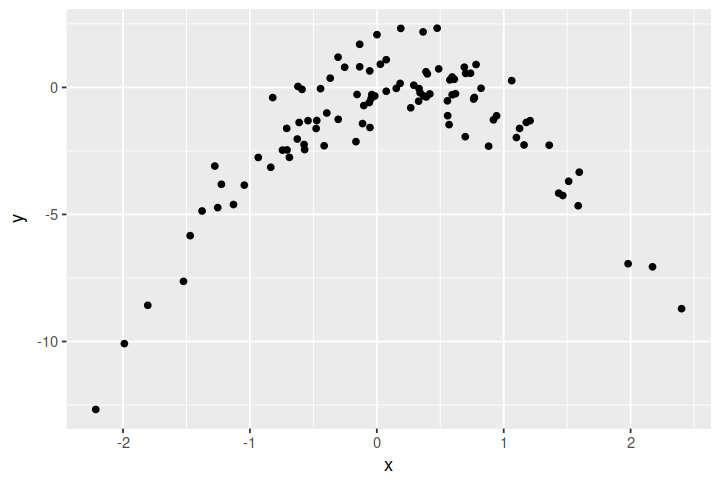

In [47]:
data <- data.frame(x=x, y=y)
options(repr.plot.height = 4, repr.plot.width = 6)
ggplot(data, aes(x, y)) + geom_point()

There’s a non-linear relationship between **x** and **y**, which is obvious by looking at how we generated the data.

c) Set a random seed and then compute the LOOCV for the following four models using least squares:

- $Y = \beta_0 + \beta_1 X + \epsilon$
- $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$
- $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$
- $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$

In [48]:
data <- data.frame(x=x, y=y)

In [49]:
cv.glm(data, glm(y ~ x))$delta

[1] 7.288162 7.284744

In [50]:
cv.glm(data, glm(y ~ poly(x, 2)))$delta

[1] 0.9374236 0.9371789

In [51]:
cv.glm(data, glm(y ~ poly(x, 3)))$delta

[1] 0.9566218 0.9562538

In [52]:
cv.glm(data, glm(y ~ poly(x, 4)))$delta

[1] 0.9539049 0.9534453

d) Repeat c) usuing another random seed.

No, because LOOCV does not depend on random numbers.

e) Which of the models in c) had the smallest LOOCV error?

The second model, with a quadratic term, because it allows the  linear model to fit nicely the  data, which has a non-linear relationship. With the quadratic term we get this scatterplot:

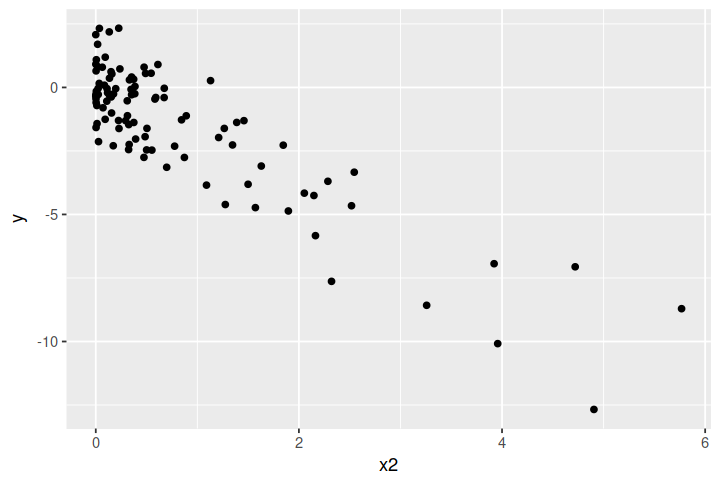

In [53]:
ggplot(data.frame(x2=x^2, y=y), aes(x2, y)) + geom_point()

f) Comment on the statistical significance of the coefficient estimates that   results from fitting each of the models in c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [54]:
summary(glm(y ~ poly(x, 1)))


Call:
glm(formula = y ~ poly(x, 1))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.550      0.260  -5.961 3.95e-08 ***
poly(x, 1)     6.189      2.600   2.380   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


In [55]:
summary(glm(y ~ poly(x, 2)))


Call:
glm(formula = y ~ poly(x, 2))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2


In [56]:
summary(glm(y ~ poly(x, 3)))


Call:
glm(formula = y ~ poly(x, 3))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2


In [57]:
summary(glm(y ~ poly(x, 4)))


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


Yes, the statistical significance agree with the conclusion that the best model is the model with the quadractic term.

## Exercise 9

**Boston** data set.

In [58]:
library("MASS")

In [59]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


a) Based on this data set, provide an estimate for the population mean of **medv**. Call this estimate $\hat\mu$.

In [60]:
mu = mean(Boston$medv)
mu

[1] 22.53281

b) Provide an estimate of the standard error of $\hat\mu$. Interpret this result.

*Hint: We can compute the standard error of the sample mean by diving the sample standard deviation by the square root of the number of observations.*.

In [61]:
se = sd(Boston$medv) / sqrt(nrow(Boston))
se

[1] 0.4088611

In [62]:
c(mu - 1.96*se, mu + 1.96*se)

[1] 21.73144 23.33417

We can say the the 95% confidence interval for the $\mu$ is [21.73, 23.33].

c) Now estimate the standard error of $\hat\mu$ using the bootstrap. How does this compare to your answer from b)?

In [63]:
boot.fn <- function(data, index) {
    mean(data[index])
}

boot(Boston$medv, boot.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 22.53281 0.00975415   0.4130483

In [64]:
mu = 22.53281
se = 0.4018305
c(mu - 1.96*se, mu + 1.96*se)

[1] 21.74522 23.32040

The 95% confidence interval for $\mu$ with the bootstrap now is [21.75, 23.32], which is slightly narrower than the one computed with a single sample.

d) Compare with the results obtain using `t.test`.

In [65]:
t.test(Boston$medv)


	One Sample t-test

data:  Boston$medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


The estimate with `t.test` is even larger than the first.

e) Based on this data set, provide an estimate $\hat\mu_{med}$ for the median value of **medv**.

In [66]:
median(Boston$medv)

[1] 21.2

f) There’s no simple formula to compute the standard error of the median. Instead, estimate the standard error of the median using the bootstrap.

In [67]:
boot.fn <- function(data, index) {
    median(data[index])
}

boot(Boston$medv, boot.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 -0.0127   0.3869347

In [68]:
c(21.2+1.96*0.38, 21.2-1.96*0.38)

[1] 21.9448 20.4552

The confidence interval for the median value of **medv**, $\mu_{med}$ is [21.95, 20.46].